In [1]:
import pint
u = pint.UnitRegistry()
pint.UnitRegistry(system='mks')
import numpy as np
import pylab as plt
import os

In [2]:
σ   = 5.67e-8           #* u.W / u.m**2 / u.K**4   # W/m²/K⁴ Stefan-Boltzman constant
c   = 2.999e8           #* u.m / u.s   # m/s
h   = 6.582119569e-34   #* u.J * u.s   # Js
e   = 1.602176634e-19   #* u.A / u.s   # As
k_B = 1.38064852e-23    #* u.J / u.K   # J/K 

In [3]:
def ufunc(λ, T):
    x = h * c / (k_B * T * λ)
    U = 2.0 * np.pi * h * c**2 / λ**5 / (np.exp(x) - 1.0)
    return U

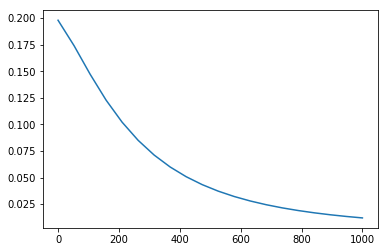

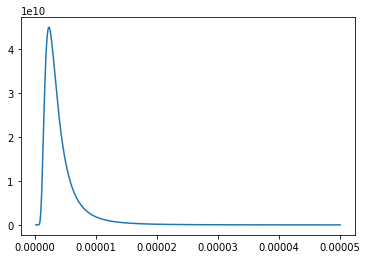

In [20]:
λ = np.mgrid[1.0e-7:5.0e-5:10000j]
dT = np.mgrid[0.0:1000.0:20j]
a = []
for d in dT:
    T = 278.0 + d
    u = ufunc(λ, T)
    i1 = np.where(λ > 13.0e-6,True,False)
    i2 = np.where(λ < 17.0e-6,True,False)
    index = i1*i2
    a.append(np.sum(u[index]) / np.sum(u))
plt.plot(dT, a)
plt.figure()
plt.plot(λ, u)
